Прежде чем сдать это задание, убедитесь, что все работает должным образом. 
Для этого следует "выполнить всё" в документе.

Убедитесь, что вы заполнили все места, где написано «ВАШ КОД ЗДЕСЬ» или «ВАШ ОТВЕТ ЗДЕСЬ».

In [ ]:
NAME = ""
COLLABORATORS = ""

#  Вводное задание. 

Вектора х1 и у1 из архива дают значения некоторой функции $f(x) .$ Постройте на графике, используя библиотечные функции:

(a) Интерполяционный Лагранжев многочлен.

(b) Интерполяционный кубический сплайн (CubicSpline).

(c) Монотонный кубический интерполянт (PchipInterpolator).

(d)  Аппроксимацию полиномами, используя функции np. polyfit и np.polyval. 

In [180]:
data = np.load('data_7_1.npz')

---

# Интерполяция полиномом Лагранжа.

Напишите класс, который конструирует интерполяционный полином Лагранжа, проходящий через точки, заданные как `xk` и `yk`.

In [16]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        n = len(self.xk) 
        l = np.ones(n)
        for i in range(n):
            for j in range(n):
                if i != j:
                    l[i] *= (x - self.xk[j]) / (self.xk[i] - self.xk[j])
        return np.sum(l * self.yk)
        
        raise NotImplementedError()

In [21]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

## Феномер Рунге

Рассмотрим функцию Рунге, $y = 1/(1 + 25x^2)$. Интерполируйте эту функцию на интервале $x\in [-2, 2]$, используя полином Лагранжа с $m=3, 5, 7, 11$. Используйте равномерную сетку. Нарисуйте результат интерполяции вместе с исходной функцией на одном графике. 

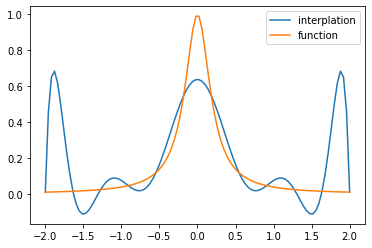

In [40]:
from matplotlib import pyplot as plt
m = 12 # число узлов интерполяции
xs = np.linspace(-2, 2, m)
ys = runge_func(xs)
lagr = LagrangeInterpolator(xs, ys)
grid = np.linspace(-2, 2, 100)
lagr_ys = np.zeros(len(grid))
for i in range(len(grid)):
    lagr_ys[i] = lagr(grid[i])
plt.plot(grid, lagr_ys, label='interplation')
plt.plot(grid, runge_func(grid), label='function')
plt.legend()

Допишите функцию, которая возвращает узлы Чебышева. 

In [115]:
def cheb_nodes(n, a=-1, b=1):
    r"""Chebyshev nodes of degree $n$ on $[a, b]$"""
    inds = np.array(range(1, n + 1))
    nodes = (a + b) / 2 + (b - a) / 2 * np.cos((2 * inds - 1) / 2 / n * np.pi)
    return np.sort(nodes)
    raise NotImplementedError()

In [119]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5) 

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

Повторите интерполяцию Лагранжа функции Рунге с помощью узлов Чебышева. Постройте интерполянты.
Также постройте интерполяцию кубическим сплайном тех же данных (`scipy.interpolate.CubicSpline`).
Сравните величину явления Рунге для равномерной сетки и сетки Чебышева. Демонстрирует ли интерполяция сплайнами феномен Рунге?


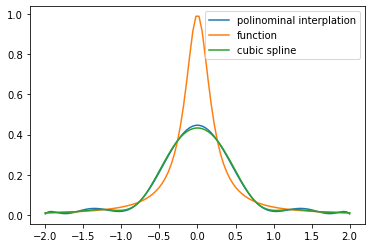

In [136]:
from scipy.interpolate import CubicSpline
m = 12# число узлов интерполяции
xs = cheb_nodes(m, -2, 2)
ys = runge_func(xs)
lagr = LagrangeInterpolator(xs, ys)
grid = np.linspace(-2, 2, 100)
lagr_ys = np.zeros(len(grid))
for i in range(len(grid)):
    lagr_ys[i] = lagr(grid[i])
cs = CubicSpline(xs, ys)
plt.plot(grid, lagr_ys, label='polinominal interplation')
plt.plot(grid, runge_func(grid), label='function')
plt.plot(grid, cs(grid), label='cubic spline')
plt.legend()

Для интерполянионного многочлена на сетке Чебышева практически на наблюдается, хотя для небольшого количества узлов приближение около нуля очень плохо(уже для m = 15 результат значительно лучше). Кубический сплайн в данной ситуации демнострирует похожее поведение.

Другим известным трудным тестом для интерполяции является следующая периодическая функция:

$u(x)=\frac{\sqrt{\varepsilon(2+\varepsilon)}}{2 \pi(1+\varepsilon-\cos x)}, \quad-\pi \leq x \leq \pi, \quad \varepsilon=0.21  $

Проведите аналогичные вычисления и постройте графики для неё.

In [141]:
def u(x, eps=0.21):
    return (eps* (2 + eps)) / 2 / np.pi / (1 + eps - np.cos(x))

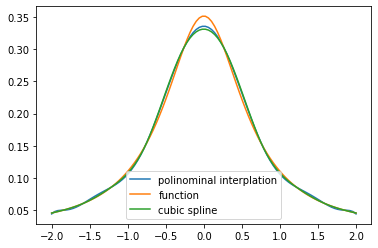

In [143]:
m = 12# число узлов интерполяции
xs = cheb_nodes(m, -2, 2)
ys = u(xs)
lagr = LagrangeInterpolator(xs, ys)
grid = np.linspace(-2, 2, 100)
lagr_ys = np.zeros(len(grid))
for i in range(len(grid)):
    lagr_ys[i] = lagr(grid[i])
cs = CubicSpline(xs, ys)
plt.plot(grid, lagr_ys, label='polinominal interplation')
plt.plot(grid, u(grid), label='function')
plt.plot(grid, cs(grid), label='cubic spline')
plt.legend()

Как сплайны, так и многочлен на узлах Чебышева неплохо приблиэают искомую функцию.

Постройте интерполяцию функций

$$
y_{1}(x)=\sin (6 x)+\sin \left(60 e^{x}\right), y_{2}(x)=\frac{1}{1+1000(x+0.5)^{2}}+\frac{1}{\sqrt{1+1000(x-0.5)^{2}}}
$$

на отрезке $[-1,1]$ полиномами Чебышева. Постройте зависимость ошибки приближения от количества узлов. Сколько узлов нужно удержать в каждом из этих случаев для получения достаточно точного приближения?

In [145]:
def y1(x):
    return np.sin(6 * x) + np.sin(60 * np.exp(x))
def y2(x):
    return 1 / (1 + 1000 * (x + 0.2)**2) + 1 / (1 + 1000 * (x-0.5)**2)**2

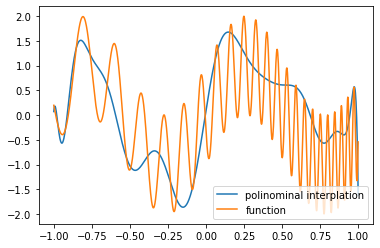

In [152]:
m = 20# число узлов интерполяции
xs = cheb_nodes(m, -1, 1)
ys = y1(xs)
lagr = LagrangeInterpolator(xs, ys)
grid = np.linspace(-1, 1, 1000)
lagr_ys = np.zeros(len(grid))
for i in range(len(grid)):
    lagr_ys[i] = lagr(grid[i])
plt.plot(grid, lagr_ys, label='polinominal interplation')
plt.plot(grid, y1(grid), label='function')
plt.legend()

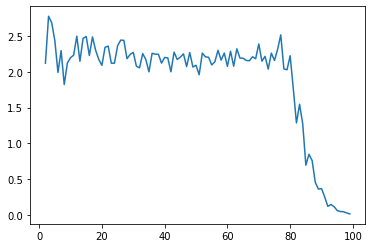

In [156]:
ers = []
M = 100
for m in range(2, M):
    xs = cheb_nodes(m, -1, 1)
    ys = y1(xs)
    lagr = LagrangeInterpolator(xs, ys)
    grid = np.linspace(-1, 1, 1000)
    lagr_ys = np.zeros(len(grid))
    for i in range(len(grid)):
        lagr_ys[i] = lagr(grid[i])
    ers.append(np.max(np.abs(lagr_ys - y1(grid))))
plt.plot(range(2, M), ers)
        

Как видно, нужно больше 100 узлов для адекватной интерполяции.

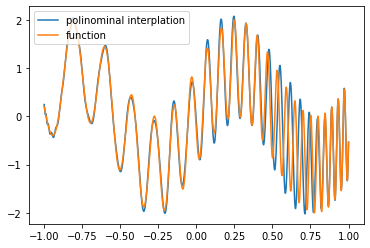

In [158]:
m = 80
xs = cheb_nodes(m, -1, 1)
ys = y1(xs)
lagr = LagrangeInterpolator(xs, ys)
grid = np.linspace(-1, 1, 1000)
lagr_ys = np.zeros(len(grid))
for i in range(len(grid)):
    lagr_ys[i] = lagr(grid[i])
plt.plot(grid, lagr_ys, label='polinominal interplation')
plt.plot(grid, y1(grid), label='function')
plt.legend()

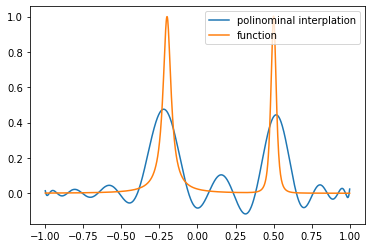

In [159]:
m = 20# число узлов интерполяции
xs = cheb_nodes(m, -1, 1)
ys = y2(xs)
lagr = LagrangeInterpolator(xs, ys)
grid = np.linspace(-1, 1, 1000)
lagr_ys = np.zeros(len(grid))
for i in range(len(grid)):
    lagr_ys[i] = lagr(grid[i])
plt.plot(grid, lagr_ys, label='polinominal interplation')
plt.plot(grid, y2(grid), label='function')
plt.legend()

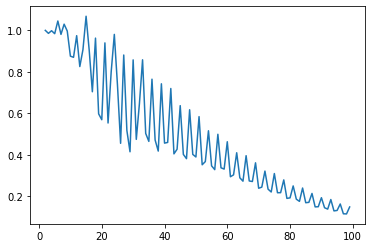

In [166]:
ers = []
M = 100
for m in range(2, M):
    xs = cheb_nodes(m, -1, 1)
    ys = y2(xs)
    lagr = LagrangeInterpolator(xs, ys)
    grid = np.linspace(-1, 1, 1000)
    lagr_ys = np.zeros(len(grid))
    for i in range(len(grid)):
        lagr_ys[i] = lagr(grid[i])
    ers.append(np.max(np.abs(lagr_ys - y2(grid))))
plt.plot(range(2, M), ers)
        

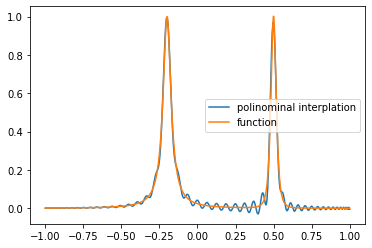

In [162]:
m = 100
xs = cheb_nodes(m, -1, 1)
ys = y2(xs)
lagr = LagrangeInterpolator(xs, ys)
grid = np.linspace(-1, 1, 1000)
lagr_ys = np.zeros(len(grid))
for i in range(len(grid)):
    lagr_ys[i] = lagr(grid[i])
plt.plot(grid, lagr_ys, label='polinominal interplation')
plt.plot(grid, y2(grid), label='function')
plt.legend()

Вектора х4 и у4 из архива дают значения некоторой функции на равномерной сетке на отрезке [-0.75, 0.75]. Используя scipy . optimize.curve_fit, постройте интерполяцию функции $y(x)$ функциями вида

$$
y_{1}(x)=p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}+p_{4} x^{4}+p_{5} x^{5}, y_{2}(x)=\frac{p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}}{1+q_{1} x+q_{2} x^{2}}
$$


Какая из этих формул лучше описывает $y(x)$ на заданном интервале? Постройте график экстраполяции $y(x)$ за пределы исходных данных. Можете ли вы угадать аналитическое выражение для $y(x) ?$

In [165]:
def interp_func1(x, p0, p1, p2, p3, p4, p5):
    return p0 + p1 * x + p2 * x**2 + p3 * x**3 + p4 * x**4 + p5 * x**5
def interp_func2(x, p0, p1, p2, p3, q1, q2):
    return (p0 + p1 * x + p2 * x**2 + p3 * x**3) / (1 + q1 * x + q2 * x**2)

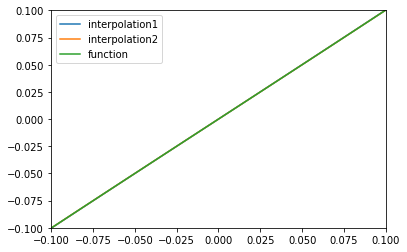

In [209]:
from scipy.optimize import curve_fit
x4 = data['x4']
y4 = data['y4']
popt1, pcov1 = curve_fit(interp_func1, x4, y4)
popt2, pcov2 = curve_fit(interp_func2, x4, y4)
plt.plot(x4, interp_func1(x4, *popt1), label='interpolation1')
plt.plot(x4, interp_func2(x4, *popt2), label='interpolation2')
plt.plot(x4, y4, label='function')
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.legend()

На указанном отрезке обе интерполяции отлично приближают функицю. Попробуем сделать экстраполяцию.

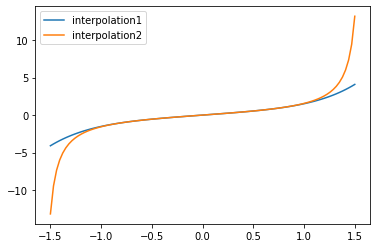

In [211]:
grid = np.linspace(-1.5, 1.5, 100)
plt.plot(grid, interp_func1(grid, *popt1), label='interpolation1')
plt.plot(grid, interp_func2(grid, *popt2), label='interpolation2')
plt.legend()

Вектора х5 и у5 из архива задают некоторую функцию на равномерной сетке на отрезке $[-1,1] .$ 

Составьте соответствующий интерполяционный многочлен и постройте его график. Ожидаемо, получившийся интерполянт демонстрирует явление Рунге. Теперь проделайте замену переменной $x \rightarrow s$ по формуле $x=g(s)$, где
$$
g(s)=\frac{1}{53089}\left(40320 s+6720 s^{3}+3024 s^{5}+1800 s^{7}+1225 s^{9}\right)
$$

 функция, приближённо отображающая равномерную сетку в сетку узлов Чебышева. В новой переменной $s$, составьте интерполяционный многочлен $P(s) .$ Постройте график получившейся интерполяции исходной функции $P(s(x))$. Делает ли такая процедура явление Рунге менее выраженным? 